# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [19]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [20]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = "C:\\Users\\inilo\\Downloads\\Datasets2503\\Datasets2503\\clasificador_paisajes" + "\\seg_train"
TEST_PATH = "C:\\Users\\inilo\\Downloads\\Datasets2503\\Datasets2503\\clasificador_paisajes" + "\\seg_test"

In [21]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)


In [22]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.

In [23]:
import random

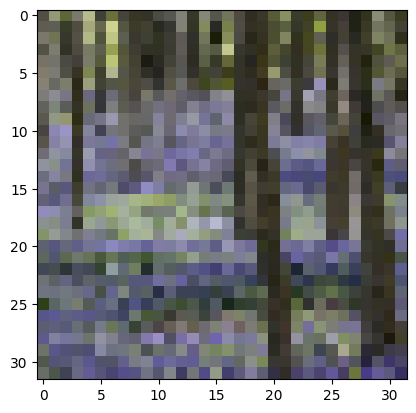

In [24]:
plt.imshow(X_train[random.randint(0,len(X_train))]);

3. Normaliza (y shuffle)

In [25]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


In [27]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada

In [28]:
input_shape = (32, 32, 3)

layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6, activation='softmax')  # 6 clases
]

model = keras.Sequential(layers)

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10)

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
history = model.fit(X_train,
         y_train,
         epochs = 30,
         callbacks = [earlystop],
         validation_split = 0.2)

Epoch 1/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4696 - loss: 1.3122 - val_accuracy: 0.6687 - val_loss: 0.8815
Epoch 2/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6741 - loss: 0.8653 - val_accuracy: 0.7253 - val_loss: 0.7486
Epoch 3/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7382 - loss: 0.7167 - val_accuracy: 0.7467 - val_loss: 0.6935
Epoch 4/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7689 - loss: 0.6206 - val_accuracy: 0.7674 - val_loss: 0.6833
Epoch 5/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8060 - loss: 0.5401 - val_accuracy: 0.7699 - val_loss: 0.6615
Epoch 6/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8377 - loss: 0.4659 - val_accuracy: 0.7617 - val_loss: 0.6718
Epoch 7/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8548 - loss: 0.4154 - val_accuracy: 0.7809 - val_loss: 0.6742
Epoch 8/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8770 - loss: 0.3438 - val_accu

6. Representa el objeto history

<Axes: >

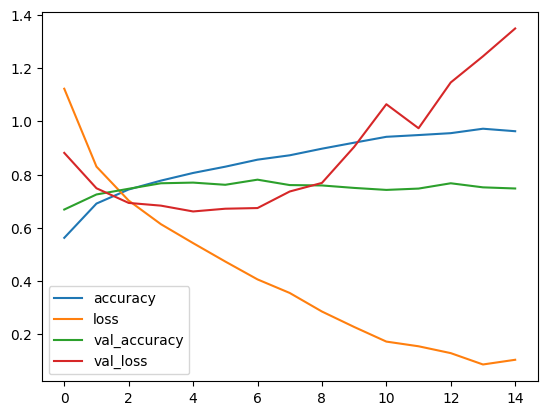

In [32]:
pd.DataFrame(history.history).plot()

7. Evalua el modelo con los datos de test

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
results = model.evaluate(X_test, y_test)
results

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7376 - loss: 1.3374


[1.2571665048599243, 0.7450000047683716]

In [36]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Elegimos la clase con mayor probabilidad

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


8. Representa algunos de los paisajes donde el modelo comete errores

In [42]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(len(class_names)))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

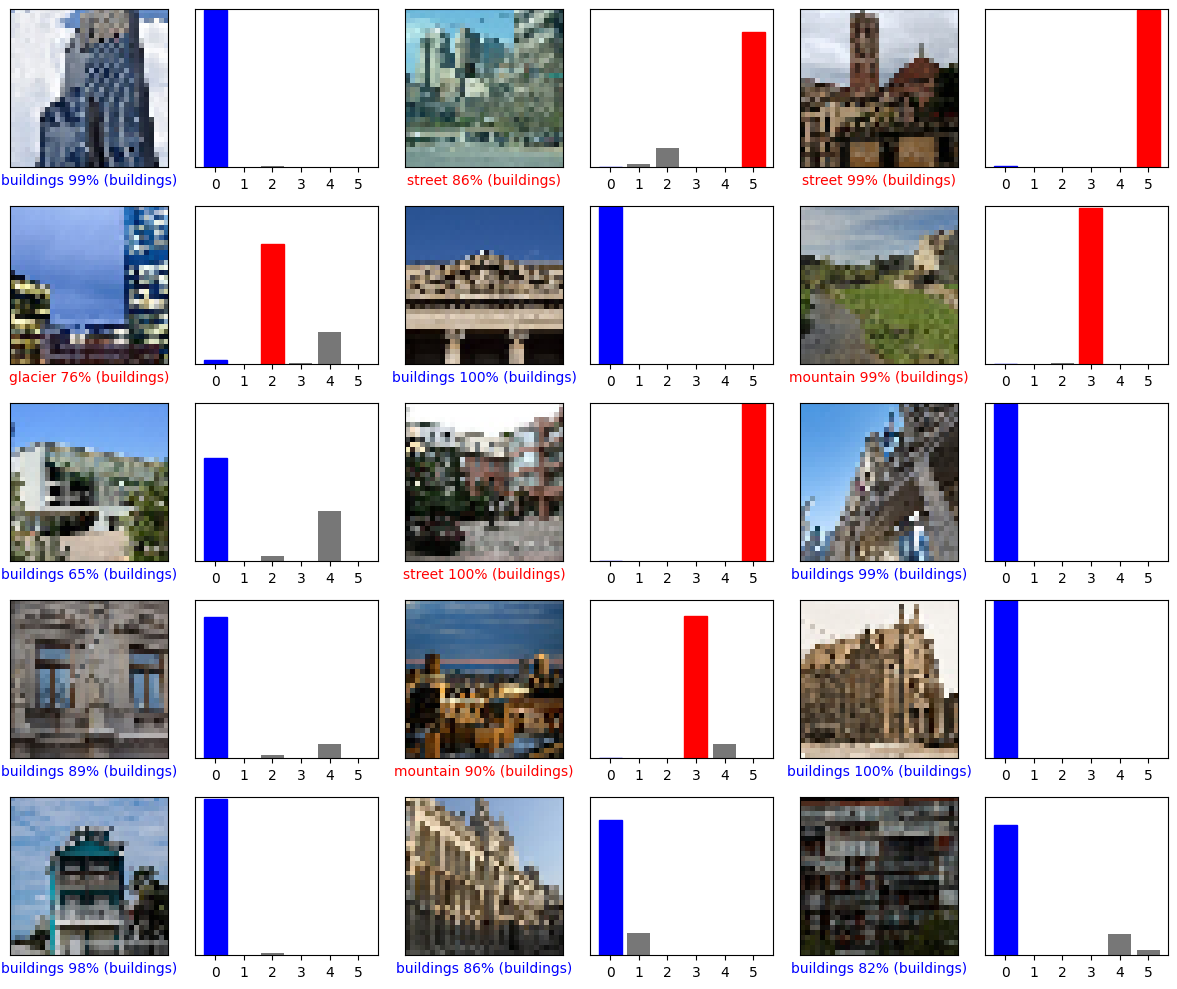

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred_probs[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred_probs[i], y_test)
plt.tight_layout()
plt.show()

9. Crea una matriz de confusión con los errores del modelo

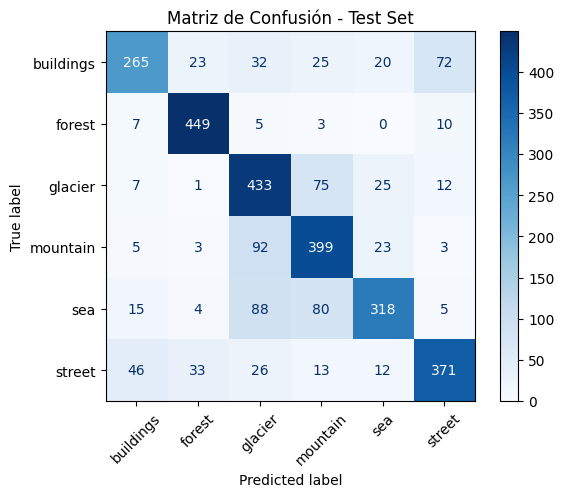

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión - Test Set")
plt.show()